<a href="https://colab.research.google.com/github/tapasML/EVAB2_Session_13_02/blob/main/YoloV3Sample_tapas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!git clone https://github.com/theschoolofai/YoloV3.git

fatal: destination path 'YoloV3' already exists and is not an empty directory.


In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
os.chdir("gdrive/MyDrive/YoloV3/")

In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.8.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [4]:
ls

 cfg/           README.md         test.py            utube/
 data/          results.json      ting               utube_002/
 detect.py      results.png       train_batch0.png   utube_003/
 models.py      results.txt       train.py           utube_1epoch/
 output/        runs/            'ubdivisions=1'     vim.exe.stackdump
 __pycache__/   test_batch0.png   utils/             weights/


In [5]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 1 --nosave

Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=1, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

2021-03-20 23:44:29.550198: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 983.63it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 104.89it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 1079.23it/s]

# Train with custom data (HardHat,Vest,Mask,Boots)

In [6]:
!python train.py --data data/assignment13/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 15 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/assignment13/custom.data', device='', epochs=15, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

2021-03-21 00:05:45.332138: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (3034 found, 0 missing, 0 empty, 0 duplicate, for 3034 images): 100% 3034/3034 [00:03<00:00, 983.73it/s]
Caching images (1.7GB): 100% 3034/3034 [00:25<00:00, 119.70it/s]
Caching labels (297 found, 0 missing, 0 empty, 0 duplicate, for 297 images): 100% 297/297 [00

# Detect / Test custom data is annotated

In [7]:
!python detect.py --weights weights/last.pt --conf-thres 0.1 --source data/assignment13/images --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/assignment13/custom.names', output='out_out', save_txt=False, source='data/assignment13/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
weights Darknet(
  (module_list): ModuleList(
    (0): Sequential(
      (Conv2d): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (BatchNorm2d): BatchNorm2d(32, eps=0.0001, momentum=0.03, affine=True, track_running_stats=True)
      (activation): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (1): Sequential(
      (Conv2d): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (BatchNorm2d): BatchNorm2d(64, eps=0.0001, momentum=0.03, affine=True

# Test sample images

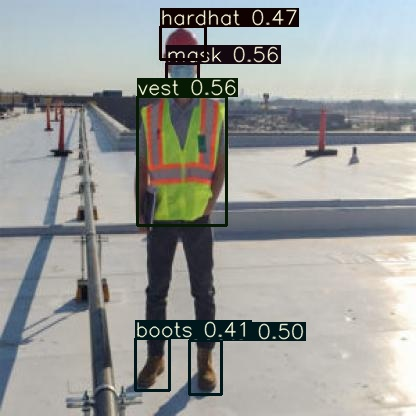

In [8]:
Image(filename='out_out/Gimage_88.jpg', width=500)

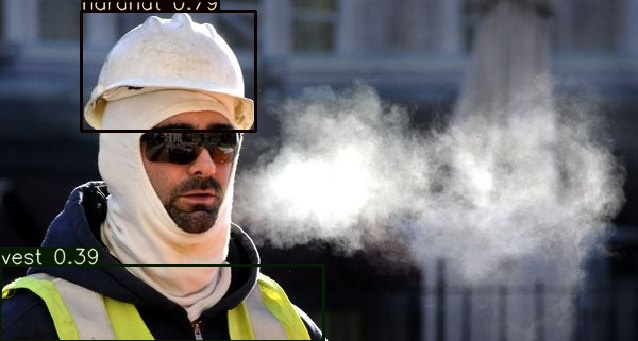

In [11]:
Image(filename='out_out/19.jpg', width=600)

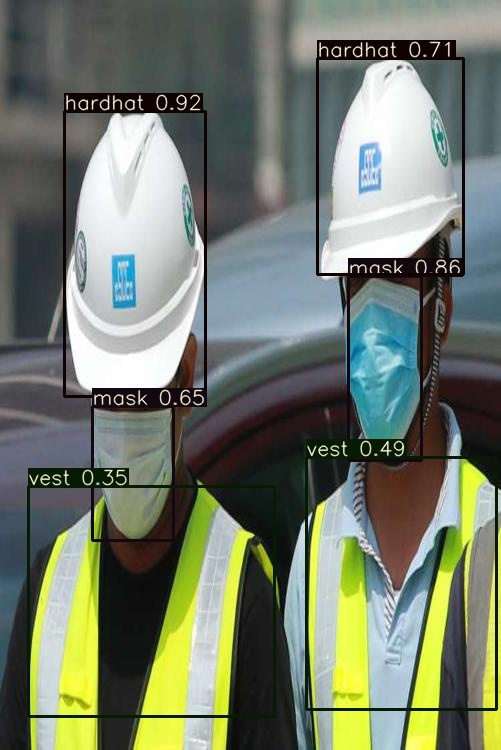

In [14]:
Image(filename='out_out/41.jpg', width=600)

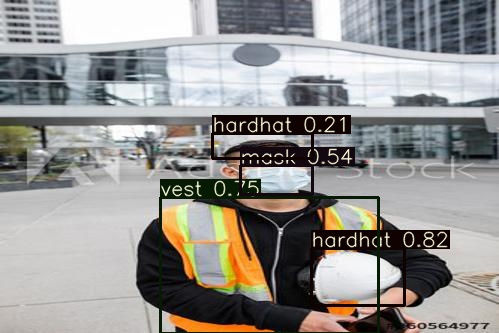

In [17]:
Image(filename='out_out/42.jpg', width=600)

# Annotate / Detect Youtube video frame jpg's

In [18]:
!python detect.py --weights weights/last.pt --conf-thres 0.1 --source data/assignment13/image_to_annotate --output utube

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/assignment13/custom.names', output='utube', save_txt=False, source='data/assignment13/image_to_annotate', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
weights Darknet(
  (module_list): ModuleList(
    (0): Sequential(
      (Conv2d): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (BatchNorm2d): BatchNorm2d(32, eps=0.0001, momentum=0.03, affine=True, track_running_stats=True)
      (activation): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (1): Sequential(
      (Conv2d): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (BatchNorm2d): BatchNorm2d(64, eps=0.0001, momentum=0.03, af

# Test sample youtube images

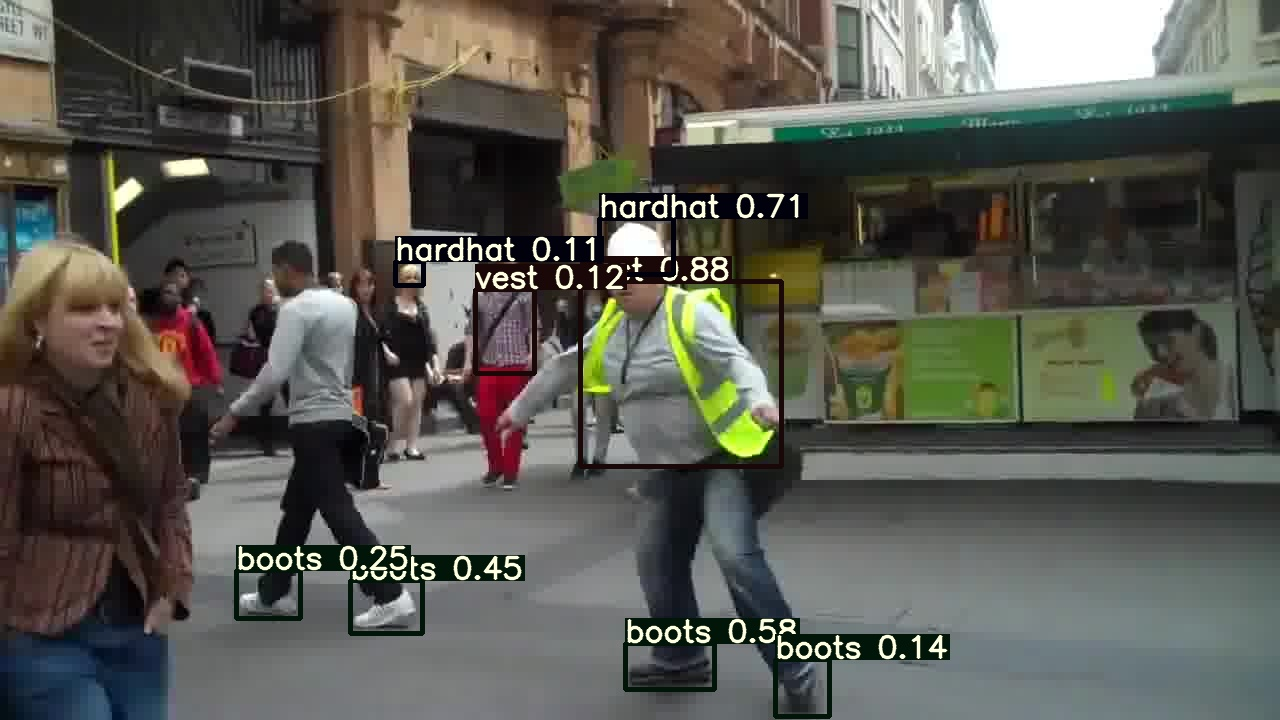

In [37]:
Image(filename='utube/out070.jpg', width=600)

# zip it up

In [35]:
import shutil
shutil.make_archive('utube', 'zip', 'utube')

'/content/gdrive/MyDrive/YoloV3/utube.zip'

# youtube link

https://www.youtube.com/watch?v=bUgQ__9wPS8


